# Generating Routes, objective functions, and Hamiltonian

This Notebook generates paths/routes on a square grid with one diagonal segment. The editable variables are, number of cars, number of routes each, size of grid, (can also specify weight of each segment, but defaulted to have weight = 1 for simplicity). 

The starting point and destination of each car can also be specified, but manually. For a large number of cars, this may not be ideal, but if there's data of all car and desired trajectories of each, this process can be programmed. However in this file, I had to specify points of my choosing so I chose to do the specifying of source and destination points manually.

The notebook saves the data for the generated car routes, the objective function and the Hamiltonian.

In [1]:
#Import Required Packages here
%matplotlib inline
import numpy as np
import networkx as nx
import sympy as sp
import tqdm
import random
import json
import pickle
import random

from sympy import *
from qiskit import *
from qiskit.visualization import *
from qiskit import IBMQ
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

**Note:** Increasing problem size, *i.e.* larger variables, may require modifications to the following visualization code(s). Moreover, too large a problem size may require the removal of visualization code(s).

In [2]:
#Variables
no_cars = 3
no_routes_each = 3
no_qubits = no_cars * no_routes_each
grid_width = 6
grid_height = 6

In [3]:
##Function

#Plot 2d grid graph (where grid-size and height of graph is given as above), and top-left is the (0,0) node.
def plot_graph( graph, edge_labels = None, title = None ): 
    #Position of nodes and labels
    pos = {} 
    for node in graph:
        pos[node] = np.array([node[1], grid_height-node[0]-1])
    pos_labels = {}
    x_off, y_off = 0.08, 0.06 #offset of label position
    for node in pos:
        pos_labels[node] = pos[node]+np.array([x_off,y_off])

    #Create plot of graph
    plt.figure(figsize = (20,10))
    if title != None:
        plt.title(str(title))
    nx.draw_networkx_nodes(graph, pos, node_size=200)
    nx.draw_networkx_edges(graph, pos, width=2)
    nx.draw_networkx_labels(graph, pos_labels, font_size=18, font_family="sans-serif")
    
    #If weights are available, and no other edge_labels are specified then label the edge by weight
    if edge_labels == None:
        edge_labels = {}
        for edge in graph.edges():
            if 'weight' in graph[edge[0]][edge[1]]:
                edge_labels[edge] = graph[edge[0]][edge[1]]['weight']
    nx.draw_networkx_edge_labels(graph, pos, 
                                 edge_labels = edge_labels, 
                                 font_size = 16)

    
    plt.show()
    return None

In [4]:
## Function

#Generate a number of routes given cars with source, target locations in a dictionary format, and the also given the map / graph
#Notes: - car trajectories must have keys in the format car1, car2, etc. and values in the format (source node, target node).
#       - 1st route will always be the shortest route
#       - also plot directed graphs with color for each car and each route

def generate_3routes( car_trajectories, graph ):
    car_routes = {}
    print("Note: Red arrows = Route 1, Blue arrows = Route 2, Green arrows = Route 3")
    for car in car_trajectories:
        car_routes[car+'_route1'] = nx.shortest_path(graph, 
                                                     source = car_trajectories[car][0], 
                                                     target = car_trajectories[car][1])
        print(car, ': generated route 1')
        
        #Generate random route 2, which isnt route 1
        while True:
            paths = nx.all_simple_paths(grid, source = car_trajectories[car][0], target = car_trajectories[car][1],
                                        cutoff = len(car_routes[car+'_route1']) +1 )
            random_path = random.choice(tuple(paths))
            if random_path != car_routes[car+'_route1']:
                car_routes[car+'_route2'] = random_path
                break
        print(car, ': generated route 2')

        #Generate a random route 3 for each car, which isn't route 1 nor route 2
        while True:
            paths = nx.all_simple_paths(grid, source = car_trajectories[car][0], target = car_trajectories[car][1],
                                        cutoff = len(car_routes[car+'_route1']) +1 )
            random_path = random.choice(tuple(paths))
            
            if random_path != car_routes[car+'_route1'] and random_path != car_routes[car+'_route2']:
                car_routes[car+'_route3'] = random_path
                break
        print(car, ': generated route 3')

        #Build directed graphs for the routes of each car (separately) 
        cars_paths = nx.DiGraph()
        for route in car_routes:
            if route[3] == car[3]:
                if route[10] == '1':
                    nx.add_path(cars_paths, car_routes[route], color = 'red')
                if route[10] == '2':
                    nx.add_path(cars_paths, car_routes[route], color = 'green')
                if route[10] == '3':
                    nx.add_path(cars_paths, car_routes[route], color = 'blue')

        #Position of nodes and labels        
        pos = {} 
        for node in cars_paths:
            pos[node] = np.array([node[1], grid_height-node[0]-1])
        pos_labels = {}
        x_off, y_off = 0.06, 0.04 #offset of label position
        for node in pos:
            pos_labels[node] = pos[node]+np.array([x_off,y_off])

        #Edge coloring for easy visualizing with labels
        edge_colors = []
        for edge in cars_paths.edges():
            edge_colors.append(cars_paths[edge[0]][edge[1]]['color'])

        #Plot graph
        plt.figure(figsize = (20,10))
        plt.title(str(car))
        nx.draw_networkx_nodes(cars_paths, pos, node_size=200, node_color = 'black')
        nx.draw_networkx_edges(cars_paths, pos, arrowstyle="-|>", arrowsize=25, width=2, edge_color = edge_colors)
        nx.draw_networkx_labels(cars_paths, pos_labels, font_size=18, font_family="sans-serif")
        plt.show()
    return car_routes

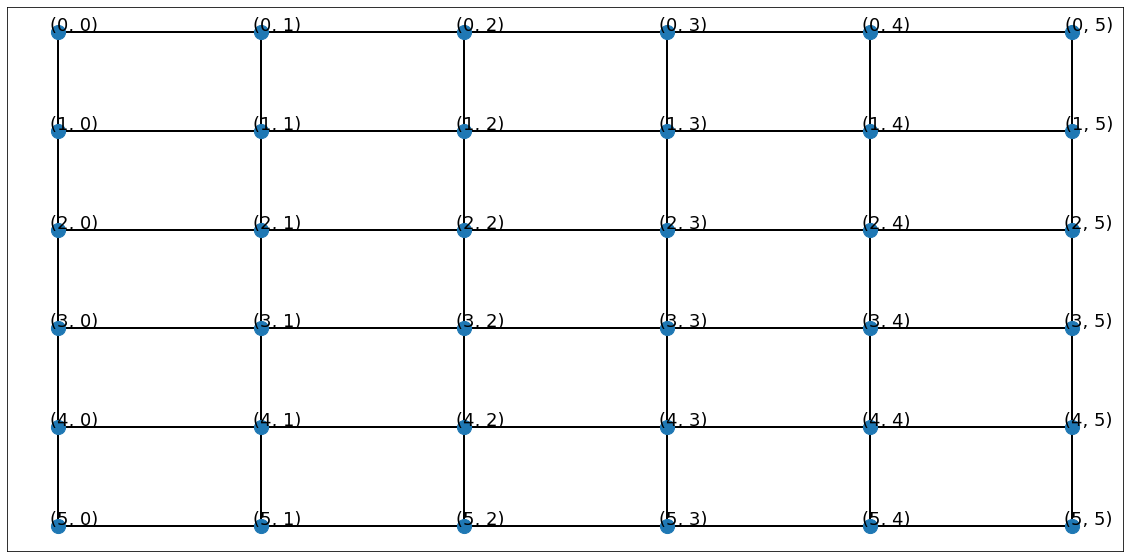

In [5]:
#Build a 2D-grid according to size defined above
grid = nx.grid_2d_graph(grid_height, grid_width)
plot_graph(grid)

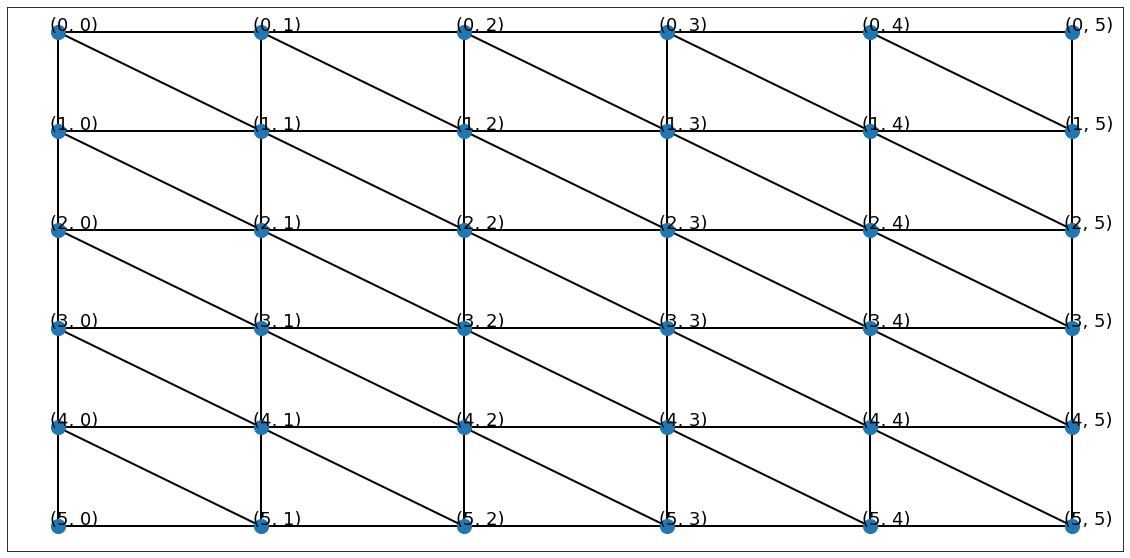

In [6]:
#Adding diagonal edges
for node in grid:
    if (node[0]+1,node[1]+1) in grid:
        grid.add_edge(node,(node[0]+1,node[1]+1))
plot_graph( grid )

In [7]:
#Adds 'weight'  1 to each edge. The weight variable(s) can be edited as required.
for edge in grid.edges():
    grid[edge[0]][edge[1]]['weight']=random.randrange(1,15,1)
plot_graph(grid)

Note: Red arrows = Route 1, Blue arrows = Route 2, Green arrows = Route 3
car1 : generated route 1
car1 : generated route 2
car1 : generated route 3


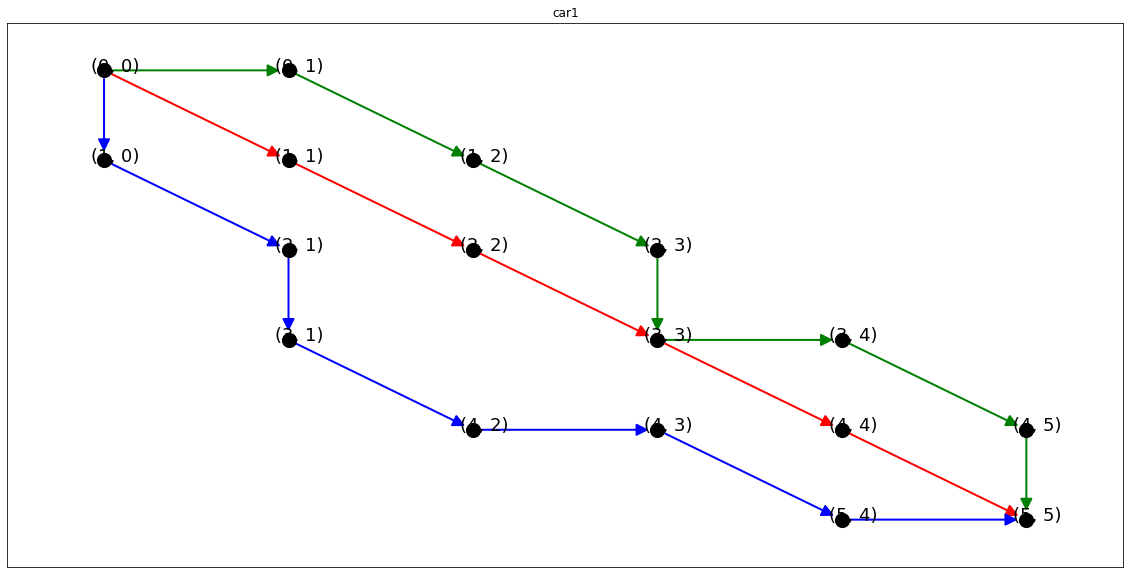

car2 : generated route 1
car2 : generated route 2
car2 : generated route 3


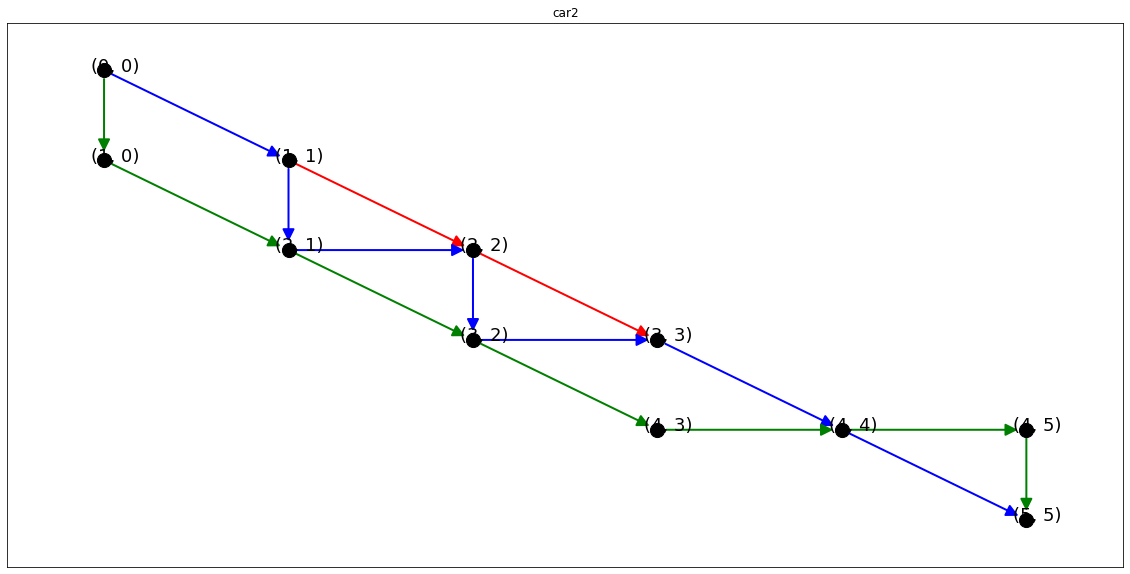

car3 : generated route 1
car3 : generated route 2
car3 : generated route 3


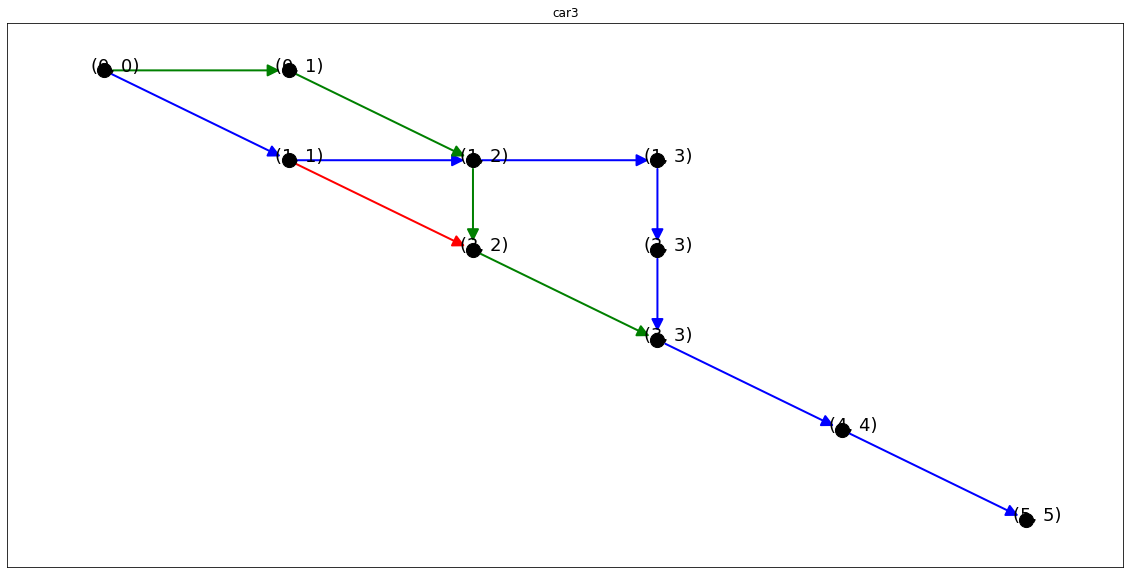

{'car1_route1': [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)], 'car1_route2': [(0, 0), (0, 1), (1, 2), (2, 3), (3, 3), (3, 4), (4, 5), (5, 5)], 'car1_route3': [(0, 0), (1, 0), (2, 1), (3, 1), (4, 2), (4, 3), (5, 4), (5, 5)], 'car2_route1': [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)], 'car2_route2': [(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (4, 4), (4, 5), (5, 5)], 'car2_route3': [(0, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (4, 4), (5, 5)], 'car3_route1': [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)], 'car3_route2': [(0, 0), (0, 1), (1, 2), (2, 2), (3, 3), (4, 4), (5, 5)], 'car3_route3': [(0, 0), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 4), (5, 5)]}


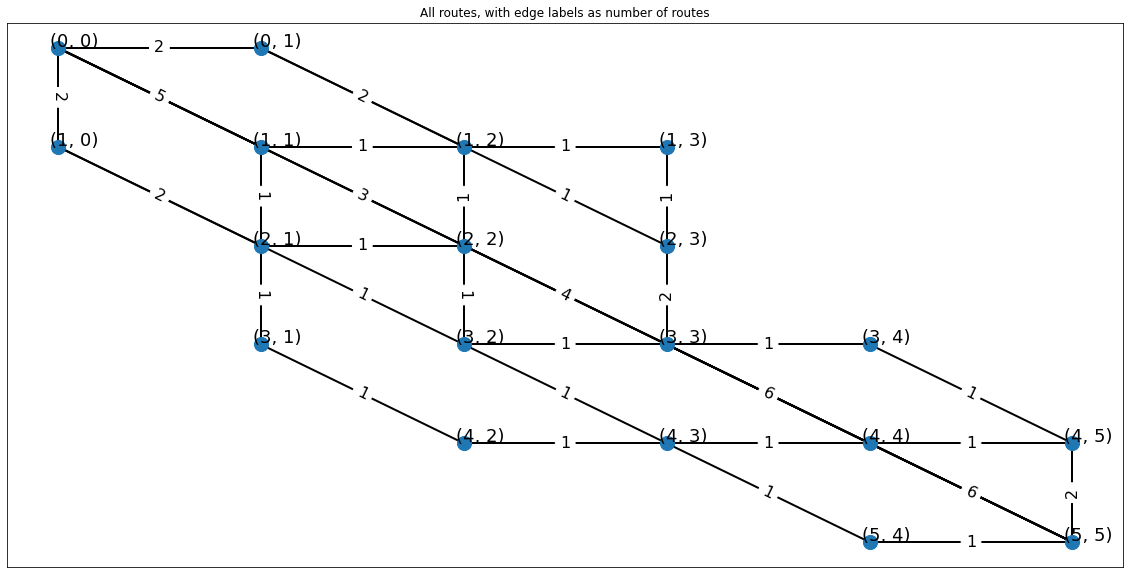

In [150]:
#Define the desired routes of cars here by ( starting_node, destination_node )
car_paths = {}
car_paths['car1'] = ((0,0),(5,5))
car_paths['car2'] = ((0,0),(5,5))
car_paths['car3'] = ((0,0),(5,5))

#Generate routes
car_routes = generate_3routes(car_paths, grid)
print(car_routes)

#Now draw all routes in one Graph (using MultiGraph)
all_routes = nx.MultiGraph()
for routes in car_routes:
    nx.add_path(all_routes, car_routes[routes])

#Set edge labels as number of routes instead of weight
edge_labels = {} 
for edge in all_routes.edges():
    edge_labels[edge] = tuple(all_routes.edges()).count(tuple(edge))
plot_graph(all_routes, edge_labels, 'All routes, with edge labels as number of routes')

In [151]:
#Save the generated car routes onto a JSON file.
routes_file = open("3cars3routes.json", "w+")
json.dump(car_routes, routes_file)
routes_file.close()

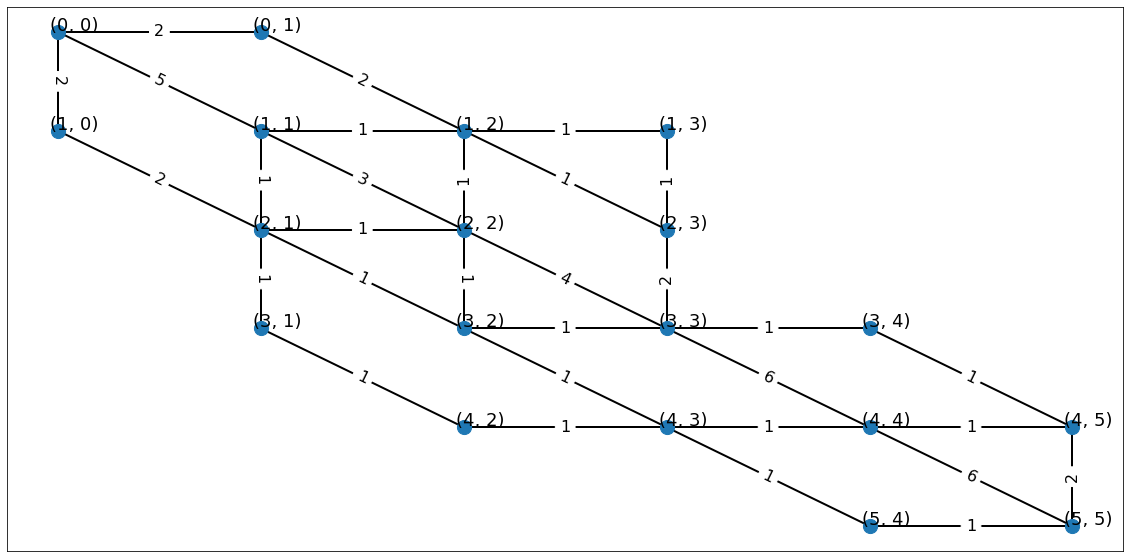

In [152]:
#Create a simpleGraph (no multiple Edges between pairs of nodes) with summed weightings of edges
#The graph for this should look exactly the same as the above, but the class is now different, and the data is actually smaller
all_routes_simple = nx.Graph()
for u,v,data in all_routes.edges(data=True):
    w = data['weight'] if 'weight' in data else 1
    if all_routes_simple.has_edge(u,v):
        all_routes_simple[u][v]['weight'] += w
    else:
        all_routes_simple.add_edge(u, v, weight=w)
        
plot_graph(all_routes_simple)

In [153]:
#Rewrite routes as lists of edges instead of lists of nodes
car_routes_edges = {}
for route in car_routes:
    car_routes_edges[route] = []
    for i in range(len(car_routes[route])-1):
        car_routes_edges[route].append((car_routes[route][i],car_routes[route][i+1]))

In [177]:
#Creating binary variables
Q = IndexedBase('Q')
car_routes_variables = {}
for route in car_routes:
    car_routes_variables[route] = Q[route[3],route[10]]

In [155]:
car_routes_edges

{'car1_route1': [((0, 0), (1, 1)),
  ((1, 1), (2, 2)),
  ((2, 2), (3, 3)),
  ((3, 3), (4, 4)),
  ((4, 4), (5, 5))],
 'car1_route2': [((0, 0), (0, 1)),
  ((0, 1), (1, 2)),
  ((1, 2), (2, 3)),
  ((2, 3), (3, 3)),
  ((3, 3), (3, 4)),
  ((3, 4), (4, 5)),
  ((4, 5), (5, 5))],
 'car1_route3': [((0, 0), (1, 0)),
  ((1, 0), (2, 1)),
  ((2, 1), (3, 1)),
  ((3, 1), (4, 2)),
  ((4, 2), (4, 3)),
  ((4, 3), (5, 4)),
  ((5, 4), (5, 5))],
 'car2_route1': [((0, 0), (1, 1)),
  ((1, 1), (2, 2)),
  ((2, 2), (3, 3)),
  ((3, 3), (4, 4)),
  ((4, 4), (5, 5))],
 'car2_route2': [((0, 0), (1, 0)),
  ((1, 0), (2, 1)),
  ((2, 1), (3, 2)),
  ((3, 2), (4, 3)),
  ((4, 3), (4, 4)),
  ((4, 4), (4, 5)),
  ((4, 5), (5, 5))],
 'car2_route3': [((0, 0), (1, 1)),
  ((1, 1), (2, 1)),
  ((2, 1), (2, 2)),
  ((2, 2), (3, 2)),
  ((3, 2), (3, 3)),
  ((3, 3), (4, 4)),
  ((4, 4), (5, 5))],
 'car3_route1': [((0, 0), (1, 1)),
  ((1, 1), (2, 2)),
  ((2, 2), (3, 3)),
  ((3, 3), (4, 4)),
  ((4, 4), (5, 5))],
 'car3_route2': [((0, 0), (0

In [174]:
#Associating cost of routes appearing in segments/edges
cost_edge = {}
for edge in all_routes_simple.edges():
    cost = 0
    for route in car_routes_edges:
        if edge in car_routes_edges[route] or (edge[1],edge[0]) in car_routes_edges[route]:
            cost += car_routes_variables[route]
    cost_edge[edge] = (grid.edges[edge]['weight'], cost)
cost_edge

{((0, 0), (1, 1)): (3, Q[1, 1] + Q[2, 1] + Q[2, 3] + Q[3, 1] + Q[3, 3]),
 ((0, 0), (0, 1)): (9, Q[1, 2] + Q[3, 2]),
 ((0, 0), (1, 0)): (2, Q[1, 3] + Q[2, 2]),
 ((1, 1), (2, 2)): (6, Q[1, 1] + Q[2, 1] + Q[3, 1]),
 ((1, 1), (2, 1)): (13, Q[2, 3]),
 ((1, 1), (1, 2)): (14, Q[3, 3]),
 ((0, 1), (1, 2)): (3, Q[1, 2] + Q[3, 2]),
 ((1, 0), (2, 1)): (10, Q[1, 3] + Q[2, 2]),
 ((2, 2), (3, 3)): (4, Q[1, 1] + Q[2, 1] + Q[3, 1] + Q[3, 2]),
 ((2, 2), (2, 1)): (4, Q[2, 3]),
 ((2, 2), (3, 2)): (14, Q[2, 3]),
 ((2, 2), (1, 2)): (10, Q[3, 2]),
 ((2, 1), (3, 1)): (10, Q[1, 3]),
 ((2, 1), (3, 2)): (10, Q[2, 2]),
 ((1, 2), (2, 3)): (11, Q[1, 2]),
 ((1, 2), (1, 3)): (7, Q[3, 3]),
 ((3, 3), (4, 4)): (3,
  Q[1, 1] + Q[2, 1] + Q[2, 3] + Q[3, 1] + Q[3, 2] + Q[3, 3]),
 ((3, 3), (2, 3)): (2, Q[1, 2] + Q[3, 3]),
 ((3, 3), (3, 4)): (9, Q[1, 2]),
 ((3, 3), (3, 2)): (9, Q[2, 3]),
 ((3, 2), (4, 3)): (5, Q[2, 2]),
 ((4, 4), (5, 5)): (14,
  Q[1, 1] + Q[2, 1] + Q[2, 3] + Q[3, 1] + Q[3, 2] + Q[3, 3]),
 ((4, 4), (4, 3)): (1

In [175]:
#Summing total cost over all segments
total_cost = 0
for edge in cost_edge:
    total_cost += cost_edge[edge][0]*( (cost_edge[edge][1])**2 + cost_edge[edge][1] )
    
#Simplify binary expresson
total_cost = expand(total_cost)
for variable in car_routes_variables.values():
    total_cost = total_cost.subs(variable**2, variable)
total_cost

60*Q[1, 1]*Q[2, 1] + 40*Q[1, 1]*Q[2, 3] + 60*Q[1, 1]*Q[3, 1] + 42*Q[1, 1]*Q[3, 2] + 40*Q[1, 1]*Q[3, 3] + 60*Q[1, 1] + 4*Q[1, 2]*Q[2, 2] + 24*Q[1, 2]*Q[3, 2] + 4*Q[1, 2]*Q[3, 3] + 76*Q[1, 2] + 24*Q[1, 3]*Q[2, 2] + 118*Q[1, 3] + 40*Q[2, 1]*Q[2, 3] + 60*Q[2, 1]*Q[3, 1] + 42*Q[2, 1]*Q[3, 2] + 40*Q[2, 1]*Q[3, 3] + 60*Q[2, 1] + 104*Q[2, 2] + 40*Q[2, 3]*Q[3, 1] + 34*Q[2, 3]*Q[3, 2] + 40*Q[2, 3]*Q[3, 3] + 120*Q[2, 3] + 42*Q[3, 1]*Q[3, 2] + 40*Q[3, 1]*Q[3, 3] + 60*Q[3, 1] + 34*Q[3, 2]*Q[3, 3] + 86*Q[3, 2] + 102*Q[3, 3]

In [179]:
#Add constraint terms to each car
constraints = {}
for i in range(no_cars):
    constraints['car'+str(i+1)]=-1
    for j in range(no_routes_each):
        constraints['car'+str(i+1)] += Q[i+1,j+1]
constraints

{'car1': Q[1, 1] + Q[1, 2] + Q[1, 3] - 1,
 'car2': Q[2, 1] + Q[2, 2] + Q[2, 3] - 1,
 'car3': Q[3, 1] + Q[3, 2] + Q[3, 3] - 1}

In [180]:
#Sum over all constraints
total_constraint = 0
for constraint in constraints:
    total_constraint += constraints[constraint]**2
    
#Simplify binary expresson
total_constraint = expand(total_constraint)
for variable in car_routes_variables.values():
    total_constraint = total_constraint.subs(variable**2, variable)
total_constraint

2*Q[1, 1]*Q[1, 2] + 2*Q[1, 1]*Q[1, 3] - Q[1, 1] + 2*Q[1, 2]*Q[1, 3] - Q[1, 2] - Q[1, 3] + 2*Q[2, 1]*Q[2, 2] + 2*Q[2, 1]*Q[2, 3] - Q[2, 1] + 2*Q[2, 2]*Q[2, 3] - Q[2, 2] - Q[2, 3] + 2*Q[3, 1]*Q[3, 2] + 2*Q[3, 1]*Q[3, 3] - Q[3, 1] + 2*Q[3, 2]*Q[3, 3] - Q[3, 2] - Q[3, 3] + 3

In [181]:
#Export the cost and the constraints to be used to make the QAOA object
cost_constraints = [total_cost, constraints] 
with open('cost_constraints.pkl', 'wb') as f:
    pickle.dump(cost_constraints, f)

## The code below is no longer required, but rather it shows how the cost and constraints can be turned to an Ising Hamiltonian (Qiskit's QAOA class has a built-in function to do this just given the cost and the constraints).

In [182]:
#constraint factor to increase weight of constraint, making sure it is more than weight of total cost
constraint_factor = np.amax(np.array(Poly(total_cost).coeffs()))*1.1
constraint_factor

132.000000000000

In [183]:
objective = total_cost + constraint_factor*total_constraint
objective

264.0*Q[1, 1]*Q[1, 2] + 264.0*Q[1, 1]*Q[1, 3] + 60*Q[1, 1]*Q[2, 1] + 40*Q[1, 1]*Q[2, 3] + 60*Q[1, 1]*Q[3, 1] + 42*Q[1, 1]*Q[3, 2] + 40*Q[1, 1]*Q[3, 3] - 72.0*Q[1, 1] + 264.0*Q[1, 2]*Q[1, 3] + 4*Q[1, 2]*Q[2, 2] + 24*Q[1, 2]*Q[3, 2] + 4*Q[1, 2]*Q[3, 3] - 56.0*Q[1, 2] + 24*Q[1, 3]*Q[2, 2] - 14.0*Q[1, 3] + 264.0*Q[2, 1]*Q[2, 2] + 304.0*Q[2, 1]*Q[2, 3] + 60*Q[2, 1]*Q[3, 1] + 42*Q[2, 1]*Q[3, 2] + 40*Q[2, 1]*Q[3, 3] - 72.0*Q[2, 1] + 264.0*Q[2, 2]*Q[2, 3] - 28.0*Q[2, 2] + 40*Q[2, 3]*Q[3, 1] + 34*Q[2, 3]*Q[3, 2] + 40*Q[2, 3]*Q[3, 3] - 12.0*Q[2, 3] + 306.0*Q[3, 1]*Q[3, 2] + 304.0*Q[3, 1]*Q[3, 3] - 72.0*Q[3, 1] + 298.0*Q[3, 2]*Q[3, 3] - 46.0*Q[3, 2] - 30.0*Q[3, 3] + 396.0

In [184]:
#Now to convert objective function to a Hamiltonian
Z = IndexedBase('Z')
QZ_dict = {}
for variable in car_routes_variables:
    QZ_dict[car_routes_variables[variable]] = Z[no_cars*(int(variable[3])-1)+int(variable[10])]
Ham = objective
for Q in QZ_dict:
    Ham = Ham.subs(Q, (1-QZ_dict[Q])/2)
    Ham = expand(Ham)

In [185]:
#Store Hamiltonian to arrays (to be converted to dictionary as well)
no_qubits = no_cars * no_routes_each
Z_terms = [0 for i in range(no_qubits)]
for i in range(no_qubits):
    ZPoly = Poly(Ham.coeff(Z[i+1]), domain = 'RR')
    Z_terms[i] = round(float(ZPoly.coeffs()[len(ZPoly.coeffs())-1]), 4)
ZZ_terms = [[0 for _ in range(no_qubits)] for _ in range(no_qubits)]
for i in range(no_qubits):
    for j in range(no_qubits):
        if j>i:
            ZZ_terms[i][j] = float(Ham.coeff(Z[i+1]).coeff(Z[j+1]))

In [186]:
#Normalising
normalise_factor = max( abs(np.amin(Z_terms)), abs(np.amin(ZZ_terms)), abs(np.amax(Z_terms)), abs(np.amax(ZZ_terms)) )
Z_terms_normed = np.around(np.array(Z_terms)/normalise_factor, decimals = 4)
ZZ_terms_normed = np.around(np.array(ZZ_terms)/normalise_factor, decimals = 4)
objective_normed = objective/normalise_factor
Ham_normed = Ham/normalise_factor

In [187]:
#Save objective and Hamiltonian expressions into a pickle file
expressions = [objective, Ham, objective_normed, Ham_normed] #Save all into a list to put in one file
with open('expressions.pkl', 'wb') as f:
    pickle.dump(expressions, f)

In [188]:
#Combine all coefficients into a dictionary describing the (normalised) Hamiltonian
H = {}
for i in range(no_qubits):
    for j in range(no_qubits):
        if ZZ_terms_normed[i][j] != 0:
            Pstring = ""
            for k in range(no_qubits):
                if k == i:
                    Pstring += "Z"
                if k == j:
                    Pstring += "Z"
                elif k!=i and k!=j:
                    Pstring += "I"
            H[Pstring] = ZZ_terms_normed[i][j]
for i in range(no_qubits):
    if Z_terms_normed[i] != 0:
        Pstring = ''
        for k in range(no_qubits):
            if k == i:
                Pstring += "Z"
            elif k != i:
                Pstring += "I"
        H[Pstring] = Z_terms_normed[i]

In [189]:
#Save Hamiltonian Dictionary to a JSON file
Hamiltonian_file = open("Hamiltonian9qbits.json", "w+")
json.dump(H, Hamiltonian_file)
Hamiltonian_file.close()

In [190]:
H

{'ZZIIIIIII': 0.3782,
 'ZIZIIIIII': 0.3782,
 'ZIIZIIIII': 0.086,
 'ZIIIIZIII': 0.0573,
 'ZIIIIIZII': 0.086,
 'ZIIIIIIZI': 0.0602,
 'ZIIIIIIIZ': 0.0573,
 'IZZIIIIII': 0.3782,
 'IZIIZIIII': 0.0057,
 'IZIIIIIZI': 0.0344,
 'IZIIIIIIZ': 0.0057,
 'IIZIZIIII': 0.0344,
 'IIIZZIIII': 0.3782,
 'IIIZIZIII': 0.4355,
 'IIIZIIZII': 0.086,
 'IIIZIIIZI': 0.0602,
 'IIIZIIIIZ': 0.0573,
 'IIIIZZIII': 0.3782,
 'IIIIIZZII': 0.0573,
 'IIIIIZIZI': 0.0487,
 'IIIIIZIIZ': 0.0573,
 'IIIIIIZZI': 0.4384,
 'IIIIIIZIZ': 0.4355,
 'IIIIIIIZZ': 0.4269,
 'ZIIIIIIII': -0.8968,
 'IZIIIIIII': -0.6418,
 'IIZIIIIII': -0.7507,
 'IIIZIIIII': -0.8968,
 'IIIIZIIII': -0.7163,
 'IIIIIZIII': -1.0,
 'IIIIIIZII': -0.8968,
 'IIIIIIIZI': -0.937,
 'IIIIIIIIZ': -0.9542}